# **Downloading Dataset from kaggle**

**Step 1**

Upload kaggle.json file

In [22]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle (1).json



 **Step 2**

Setting up environment variables so that kaggle api can work properly.

In [23]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

**Step 3**

Downloading the required dataset for the particular project.

***The Dataset is made by myself.***

In [24]:
!kaggle datasets download -d yashpalsorout/fighter-jet-planes

fighter-jet-planes.zip: Skipping, found more recently modified local copy (use --force to force download)




**Step 4**

Unzip downloaded data and booooom you are ready and successfully used kaggle api.

In [25]:
!unzip "*.zip"

Archive:  fighter-jet-planes.zip
replace MIG-29K.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: MIG-29K.csv             
  inflating: Su 30.csv               
  inflating: f16.csv                 
  inflating: f22raptor.csv           
  inflating: mirage2000.csv          
  inflating: rafale.csv              
  inflating: tejas.csv               


**Step 5**

Importing required libraries

In [26]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
img_counter=[]
img_counter.append(10)

**Step 6**


Defining Structure of folder to store data and then downloading the data.

In [27]:
folder = 'MIG-29K'
url_file = 'MIG-29K.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [28]:
folder = 'Su 30'
url_file = 'Su 30.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [29]:
folder = 'f16'
url_file = 'f16.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [30]:
folder = 'f22raptor'
url_file = 'f22raptor.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [31]:
folder = 'mirage2000'
url_file = 'mirage2000.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [32]:
folder = 'rafale'
url_file = 'rafale.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [33]:
folder = 'tejas'
url_file = 'tejas.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)


**Step 7**

Definig classes that data contains

In [34]:
classes = ['MIG-29K','Su 30','f16','f22raptor','mirage2000','rafale','tejas']

**Step 8**

Making sure that every image is readable else image get deleted

In [35]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

MIG-29K


Su 30


f16


f22raptor


mirage2000


rafale


tejas


**Step 9**

Creating data bunch

In [36]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4)
data=data.normalize(imagenet_stats)
data.classes

['MIG-29K', 'Su 30', 'f16', 'f22raptor', 'mirage2000', 'rafale', 'tejas']

**Step 10**

Looking at the data

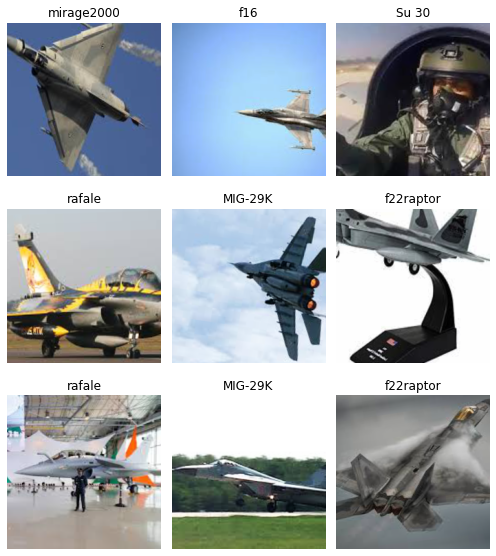

In [37]:
data.show_batch(rows=3, figsize=(7,8))

In [38]:
print(data.classes)
len(data.classes)

['MIG-29K', 'Su 30', 'f16', 'f22raptor', 'mirage2000', 'rafale', 'tejas']


7

# ***Training of Dataset***

Now we will start training our model. We will use a convolutional neural network backbone and a fully connected head with a single hidden layer as a classifier. For the moment, we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

In [39]:
%%time
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth



CPU times: user 996 ms, sys: 544 ms, total: 1.54 s
Wall time: 1.94 s


In [40]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.612808,2.296540,0.450652,19:37
1,2.135729,1.604511,0.499069,19:49
2,1.706450,1.397443,0.525140,19:47
3,1.413966,1.356187,0.538175,19:50


In [41]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
os.makedirs("/content/drive/My Drive/project",exist_ok=True)

In [43]:
my_dir="/content/drive/My Drive/project"

In [44]:
learn.save(my_dir+'/Stage-1')

In [45]:
learn.load("/content/drive/My Drive/project/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (2152 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
tejas,tejas,tejas,tejas,tejas
Path: my_data;

Valid: LabelList (537 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
f16,f22raptor,MIG-29K,MIG-29K,rafale
Path: my_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [46]:
learn.export(my_dir+"/export.pkl")

In [47]:
!pip install -U kora
from kora.drive import upload_public
my_url = upload_public(my_dir+"/export.pkl")
my_url

'https://drive.google.com/uc?id=1ZS4sROBVTkahQ9M6-9QK3dWzzPfaQbBV'

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [48]:
learn.unfreeze()

In [49]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,2.655502,2.161578,0.450652,26:00


In [53]:
learn.load('/content/drive/My Drive/project/Stage-1');

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

That's a pretty accurate model!

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8)

In [ ]:
learn.save('stage-1-50')

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

If it doesn't, you can always go back to your previous model.

In [ ]:
learn.load('stage-1-50');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=2)

# ***Result ***

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly.

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
doc(interp.plot_top_losses)

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)